In [1]:
%matplotlib inline

In [2]:
from divtel import *
from astropy.coordinates import get_icrs_coordinates

## Select the CTA location and time of observation

In [3]:
# Let's set the observing conditions. 
# Since our list contains all kind of telescopes let's set the site to Paranal
cta = CTA_Info('south','2024-02-20T00:00')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000


## Set source location

In [4]:
# By default there is no pointing direction defined for the array
print ("source:", cta.source)

source: None


In [5]:
# instead of pointing to a random alt, az coordinate a source direction can be set.
# We chose Adhara and read coordinates from astropy catalogues
name='adhara'

star = get_icrs_coordinates(name)
star_altaz=star.transform_to(cta.altaz)
cta.set_source_loc(ra=star.ra, dec=star.dec)
print ("source:", cta.source)

source: <SkyCoord (AltAz: obstime=2024-02-20T00:00:00.000, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (106.4859773, 66.55307595)>


## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

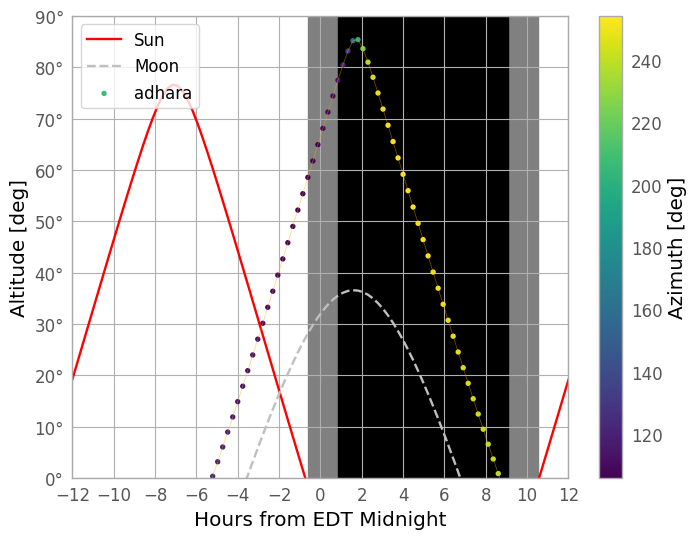

<module 'matplotlib.pyplot' from '/home/irene/miniconda3/envs/divergent/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [6]:
cta.navigation_plot(label=name)

## Load array and pointing to a source

In [7]:
# load the array and tell the code we want o point to the source previously set:
array =  LoadConfig("./config/test_config.txt", frame=cta, pointing2src=True)
# WARNING: at this stage we did not declare the divergence value, the code will set it to 0, the default value
# We can have a look at array.table and notice that all the telescopes are pointing to the same coordinates
array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,106.486,66.553,23.447,28.000,2.150,14.536,-0.113,-0.382,0.917,67.39
2,79.99,-0.77,29.0,106.486,66.553,23.447,28.000,2.150,14.536,-0.113,-0.382,0.917,84.28
3,-19.4,65.2,31.0,106.486,66.553,23.447,28.000,2.150,14.536,-0.113,-0.382,0.917,67.09
4,-120.03,1.15,33.0,106.486,66.553,23.447,28.000,2.150,14.536,-0.113,-0.382,0.917,116.02
5,-0.02,-0.0,24.0,106.486,66.553,23.447,16.000,3.850,46.707,-0.113,-0.382,0.917,4.64
6,1.43,151.02,25.0,106.486,66.553,23.447,16.000,3.850,46.707,-0.113,-0.382,0.917,151.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,245.9,-327.43,27.25,106.486,66.553,23.447,5.600,4.450,62.462,-0.113,-0.382,0.917,412.07


In [8]:
# The hFoV will at this stage be the one of parallel pointing (62.13)
array.hFoV(m_cut=3)

100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.41it/s]


(62.14707163524562, 14.17324330027432)

## Activate the divergent pointing mode

In [9]:
array.divergent_pointing(0.01)

In [10]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-20.64,-64.82,34.0,106.448,66.221,23.779,28.000,2.150,14.536,-0.114,-0.387,0.915,67.39
2,79.99,-0.77,29.0,105.313,66.677,23.323,28.000,2.150,14.536,-0.105,-0.382,0.918,84.28
3,-19.4,65.2,31.0,106.969,66.870,23.130,28.000,2.150,14.536,-0.115,-0.376,0.920,67.09
4,-120.03,1.15,33.0,108.076,66.394,23.606,28.000,2.150,14.536,-0.124,-0.381,0.916,116.02
5,-0.02,-0.0,24.0,106.428,66.555,23.445,16.000,3.850,46.707,-0.113,-0.382,0.917,4.64
6,1.43,151.02,25.0,107.045,67.324,22.676,16.000,3.850,46.707,-0.113,-0.369,0.923,151.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,245.9,-327.43,27.25,101.979,65.224,24.776,5.600,4.450,62.462,-0.087,-0.410,0.908,412.07


In [11]:
array.hFoV(m_cut=3)

100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.54it/s]


(70.82851527789862, 10.327717089427884)

100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.11it/s]


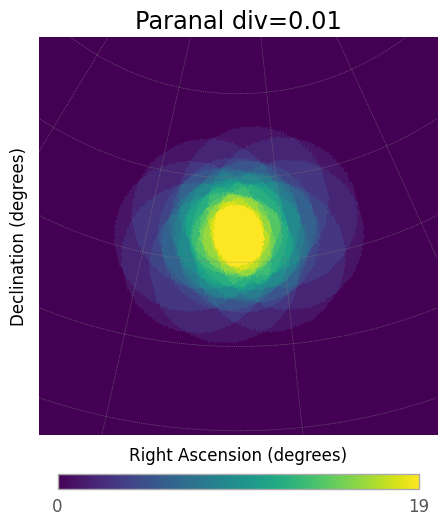

In [12]:
array.multiplicity_plot()

## Shifting the observation time and check how it change

In [13]:
array.update_frame(time = '2024-02-20T00:00', verbose=True)
array.update_frame(delta_t = 5*u.min, verbose=True)

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:05:00.000




Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:25:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.26it/s]


(70.94654094675644, 10.28558225508318)


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.14it/s]


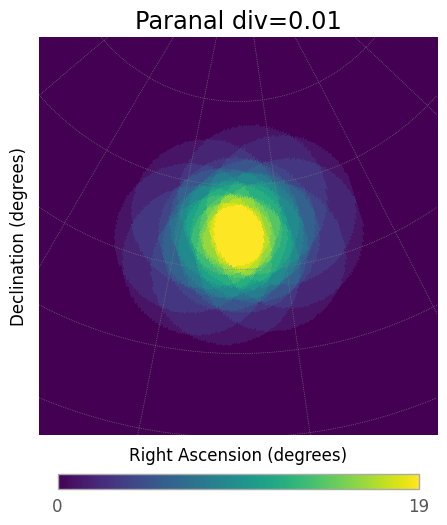



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:45:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.32it/s]


(71.10390850523353, 10.246772408705274)


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.80it/s]


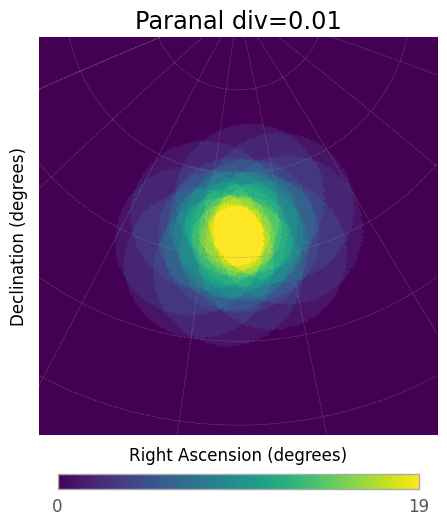



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:05:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.29it/s]


(71.16947832126566, 10.209139487746453)


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.33it/s]


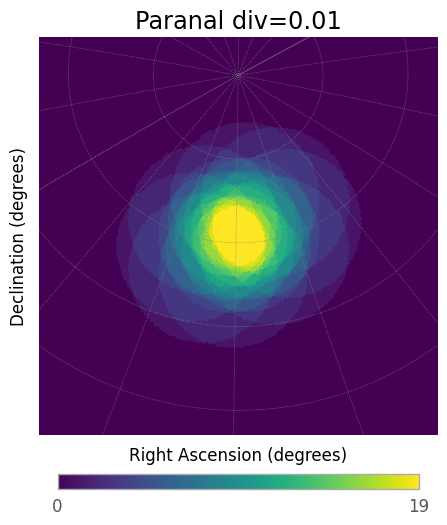



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:25:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.28it/s]


(71.26127606371062, 10.205557600294442)


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.43it/s]


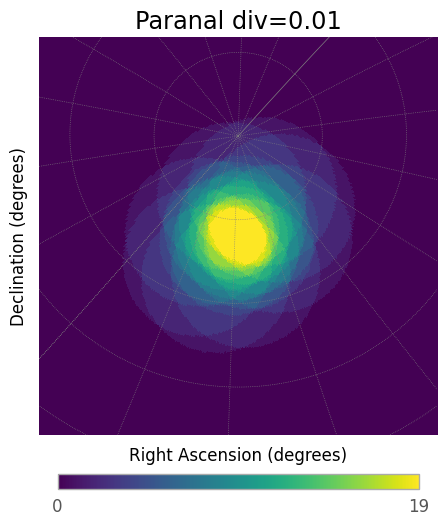



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:45:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.49it/s]


(71.26127606371062, 10.197644460802355)


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.24it/s]


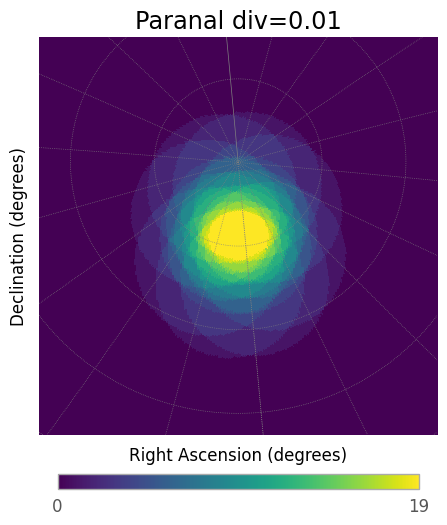



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:05:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.89it/s]


(71.37930173256845, 10.18868271173985)


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.55it/s]


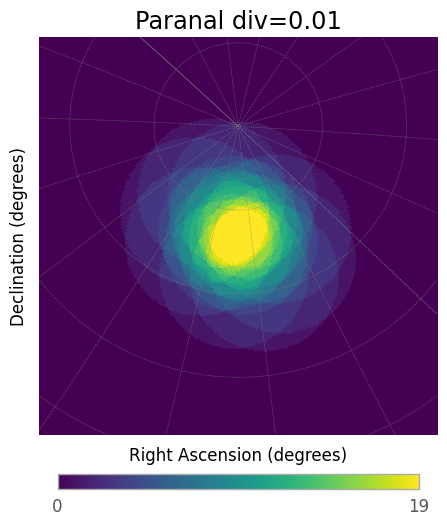

In [14]:
obs_h=2
for dt in range(int(obs_h*3)): #
    print('\n')
    initial_pointing_dir=array.get_pointing_coord(icrs=True)

    array.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame=array.frame.altaz
    star_altaz=star.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        print(array.hFoV(m_cut=3, return_multiplicity=True))
        array.multiplicity_plot()

## Get parameters (hFoV, alt, and m) as a function of time

In [ ]:
array.update_frame(time = '2024-02-20T00:00')
print(array.frame.t_obs)
fov, m_ave = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    print(array.frame.t_obs)
    fov, m_ave = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

2020-06-20T00:00:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.60it/s]


2020-06-20T00:05:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.47it/s]


2020-06-20T00:10:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.65it/s]


2020-06-20T00:15:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.88it/s]


2020-06-20T00:20:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.83it/s]


2020-06-20T00:25:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.62it/s]


2020-06-20T00:30:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.58it/s]


2020-06-20T00:35:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.69it/s]


2020-06-20T00:40:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.74it/s]


2020-06-20T00:45:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.83it/s]


2020-06-20T00:50:00.000


100%|███████████████████████████████████████████| 19/19 [00:03<00:00,  5.72it/s]


2020-06-20T00:55:00.000


  5%|██▎                                         | 1/19 [00:00<00:04,  4.30it/s]

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)